In [172]:
#!pip install hdbscan

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [174]:
data = pd.read_csv('AxlFolder/subsampled_E10-E14.csv')

In [175]:
data = data.fillna(0)
data.loc[data['sex'] == 'F', "sex"] = 2
data.loc[data['sex'] == 'M', "sex"] = 1
data.loc[data['sex'] == 'U', "sex"] = 3
data['sex'] = pd.to_numeric(data['sex'])

In [176]:
#Normalizar edad
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['age'] = scaler.fit_transform(data[['age']])


In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['years_with_diabetes'] = scaler.fit_transform(data[['years_with_diabetes']])

In [178]:
#data, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [179]:
data = data.drop('p_id', axis=1)
#data_test = data_test.drop('p_id', axis=1)

data = data.drop('stratification', axis = 1) 
#data_test = data_test.drop('stratification' , axis = 1)

data = data.drop('sex', axis = 1)
#data_test = data_test.drop('sex' , axis = 1)

data = data.drop('v_o_id', axis=1)
#data_test = data_test.drop('v_o_id', axis=1)

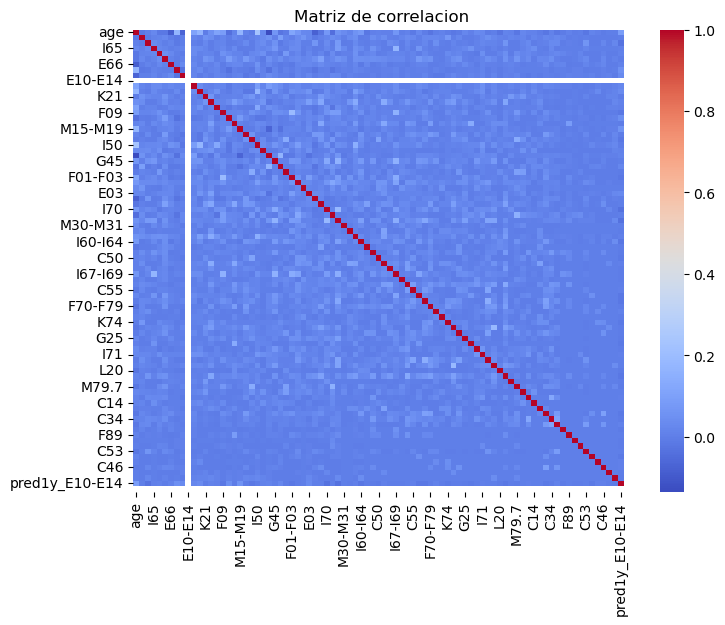

In [180]:
corr_matrix = data.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm',)
plt.title('Matriz de correlacion')
plt.show()

In [181]:
from hdbscan import HDBSCAN

X = data.drop('pred1y_E10-E14', axis=1)  

hdbscan = HDBSCAN(min_cluster_size=1500, min_samples=1000)

hdbscan.fit(X)
labels = hdbscan.labels_
data['cluster'] = labels

In [182]:

# Eliminar filas con cluster -1
data = data[data['cluster'] != -1]
X = data.drop('pred1y_E10-E14', axis=1)
labels = data['cluster']

In [183]:
data['cluster'].value_counts()

cluster
2    4858
0    1927
1    1573
Name: count, dtype: int64

In [184]:
data

,age,K73,H35,I65,J45,F30-F39,E66,I10-I15,E78,E10-E14,...,C40-C41,C53,Z89,C43,C46,C56,C73,pred1y_E10-E14,years_with_diabetes,cluster
6,-0.334257,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7,-1.577518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
10,1.530636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
12,-0.878184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
16,-0.101145,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,0.598189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
39993,0.753597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
39994,-0.955888,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
39996,0.131966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [185]:
X

,age,K73,H35,I65,J45,F30-F39,E66,I10-I15,E78,E10-E14,...,C62,C40-C41,C53,Z89,C43,C46,C56,C73,years_with_diabetes,cluster
6,-0.334257,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,-1.577518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,1.530636,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
12,-0.878184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16,-0.101145,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39986,0.598189,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
39993,0.753597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
39994,-0.955888,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
39996,0.131966,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [186]:
mask = labels != -1
silhouette_avg = silhouette_score(X[mask], labels[mask])
ch_score = calinski_harabasz_score(X[mask], labels[mask])
db_score = davies_bouldin_score(X[mask], labels[mask])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {ch_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.5420156258024541
Calinski-Harabasz Index: 9026.846955178948
Davies-Bouldin Index: 0.7323191596102637


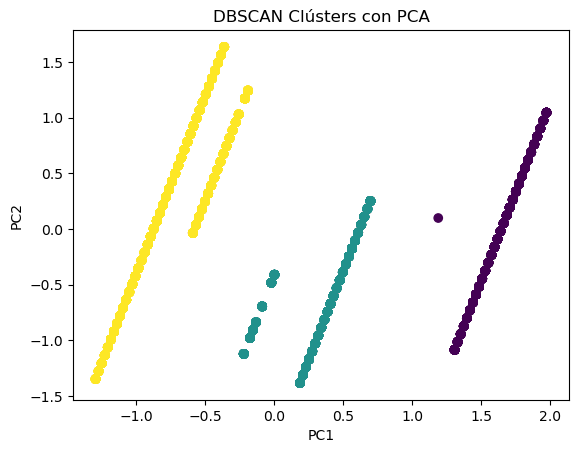

In [187]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN Clústers con PCA')
plt.show()

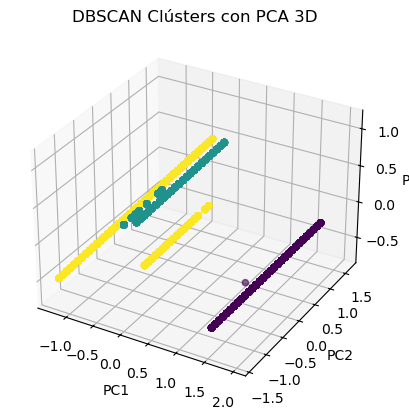

In [188]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Cambiamos a 3 componentes
X_pca = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['cluster'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clústers con PCA 3D')
plt.show()

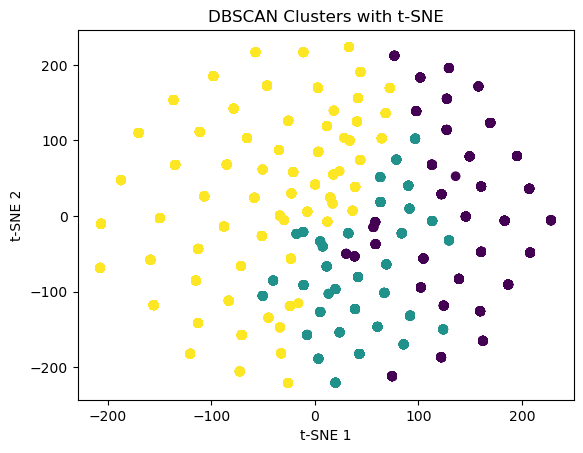

In [189]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['cluster'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('DBSCAN Clusters with t-SNE')
plt.show()

## 